In [3]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [4]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### null 값을 처리해보자

* 5개의 컬럼이 결측값을 가지고 있습니다.
* director는 1/3 정도 결측값을 가지고 있네요.

In [6]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} null rate: {round(null_rate,2)}%")

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


### 결측값을 어떻게 처리해볼까요

1. country 의 결측값은 최빈값으로 채워보도록 할게요
2. director와 cast는 'NO Data'라는 문자열로 채웁니다.

In [7]:
# Replacements
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['director'].replace(np.nan, 'No Data', inplace=True)
df['cast'].replace(np.nan, 'No Data', inplace=True)

# Drops 

df.dropna(inplace=True)

# Drops Duplicates

df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


### date 값도 바꿔봅시다

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


# Visualization

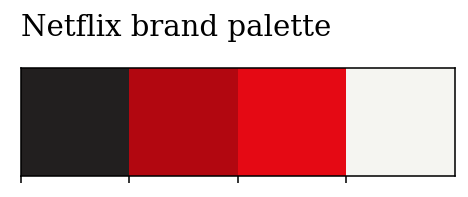

In [11]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()


In [12]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020


## 시각화 파라미터 

#### ax.scatter(x,y,s,=None,c=None)

* s
        1. 마커의 크기를 설정
        2. 마커의 크기를 바꿀 필요가 있을 떄
        3. 스칼라로 입력할 경우 마커의 크기는 고정 

* c
        1. 마커의 색상 지정
        2. plot에서 선과 동일한 코드를 입력하는 것이 가능하다.
        
* zorder : 레이어의 위치 지정. 바깥쪽에 그려지는 그림일수록 zorder가 커야됌
      
            

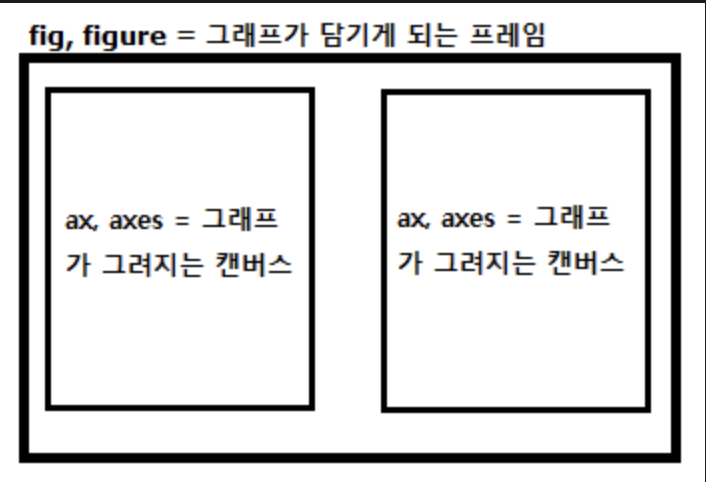

## stem :  줄기 잎 그림 

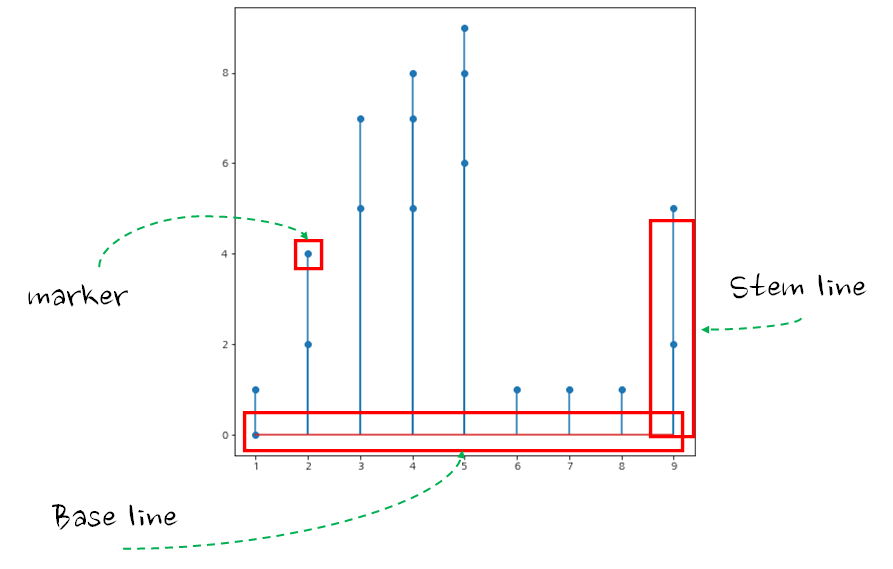

### ax.spines

plt.subplots()를 통해 반환된 ax 객체의 property로 spines가 존재합니다. 
Keys는 보시다시피 left,top,right,bottom 등 위치를 나타내고 value에서는 우리가 실제로 조작할 수 있는 객체들이 있음 

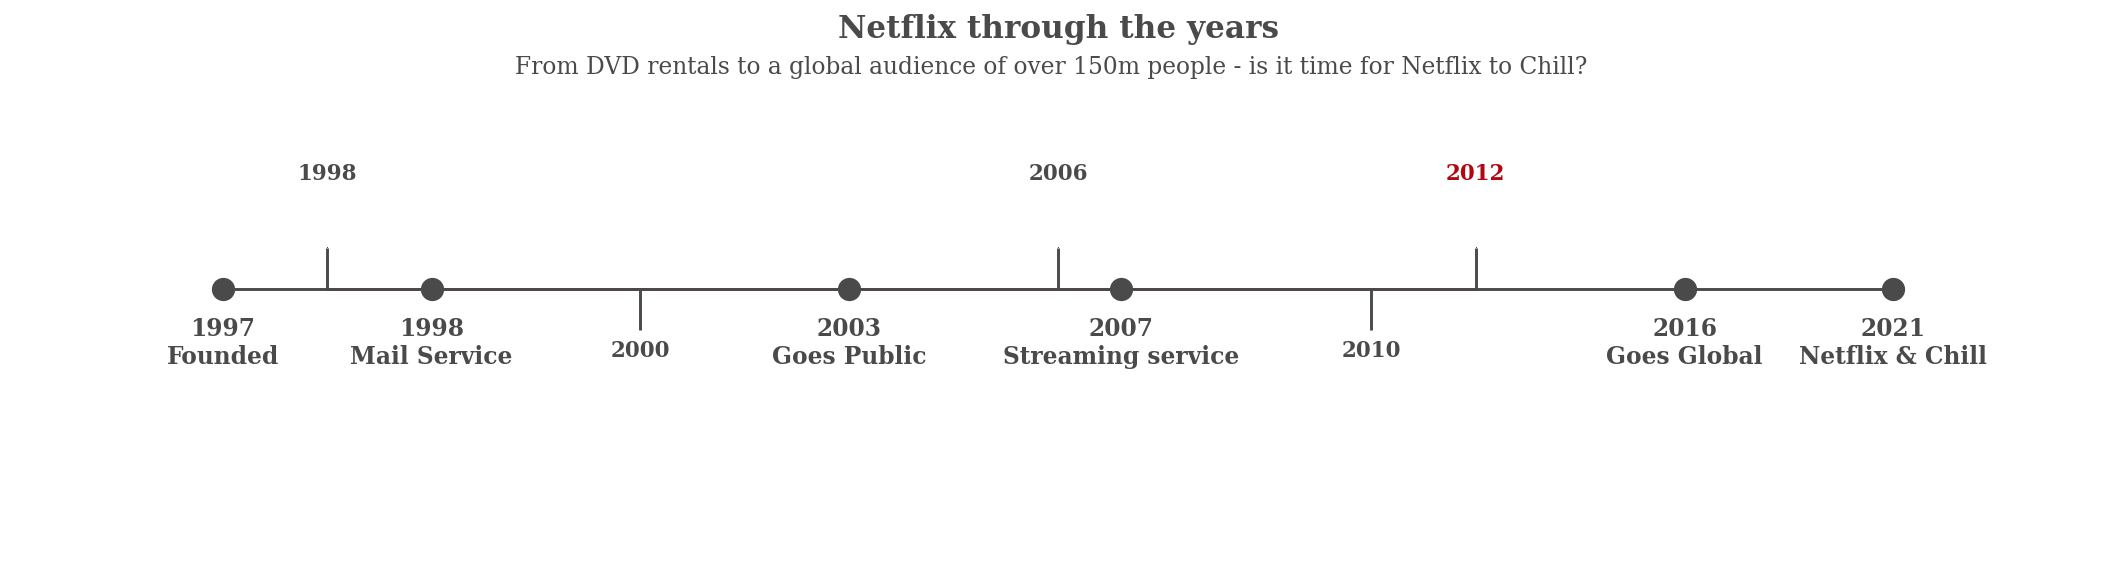

In [13]:
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]

# Set figure & Axes

fig, ax = plt.subplots(figsize=(15,4) , constrained_layout = True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0,10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)


# Timeline : Date Points

ax.scatter(tl_x, np.zeros(len(tl_x)), s=50, c="#4a4a4a", zorder=4)

# DateText

for x,date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha="center", fontfamily = 'serif', 
            fontweight="bold", color="#4a4a4a", fontsize=12)
    
# stemplot : vertical line 

levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3

markerline , stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
# use_line_collection 는 선분을 개별로 처리할지 일괄적으로 처리할지 선택하는 것. -> 공식 문서에서 True 권장 

# 선 두께, 색깔 등 좀 더 다양한 조정을 위해서 setp() 명령어를 사용할 수 있다.
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=",", color="#4a4a4a")
plt.setp(stemline, color="#4a4a4a") 

# Text

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text ):
    ax.text(x,
            1.3*(idx%2)-0.5,
            time ,
            ha='center', 
            fontfamily='serif',
            fontweight='bold',
           color="#4a4a4a" if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
# spine

for spine in ["left", "top" ,"right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
# Ticks

ax.set_xticks([])
ax.set_yticks([])

# Title 

ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

In [26]:
# For viz: Ratio of Movies & TV shows
# 영화들과 TV쇼의 비율 

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2) # 전체 데이터수로 영화와 TV쇼를 나눠서 비율을 구하기. 

mf_ratio = pd.DataFrame(r).T

In [40]:
mf_ratio

type,Movie,TV Show
type,0.7,0.3


In [59]:
mf_ratio['Movie'][0]

0.7

### Content - Let's explore 



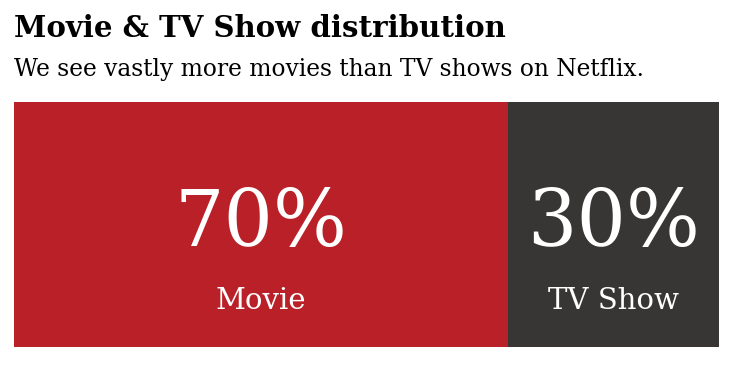

In [71]:
fig, ax = plt.subplots(1,1, figsize=(6.5, 2.5))

# barh(y=bar의 y좌표, width, left= bar의 왼쪽부분 좌표, alpha는 투명도)
ax.barh(mf_ratio.index, mf_ratio['Movie'], color="#b20710", alpha=0.9, label="Male")
ax.barh(mf_ratio.index, mf_ratio['Movie'], left=mf_ratio['Movie'], color="#221f1f", alpha=0.9, label="Female")

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])


# movie percentage
# annotate = 주석 달기

for i in mf_ratio.index:  
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
                xy = (mf_ratio['Movie'][i]/2 , i),
               va = "center", ha="center", fontsize=40, fontweight='light', fontfamily="serif", color='white')
    
    ax.annotate("Movie", 
               xy = (mf_ratio['Movie'][i]/2, -0.25),
               va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


# ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

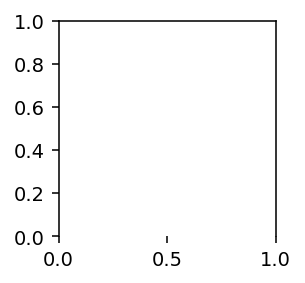

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2,2))

ax.spines['bottom'].set_visible(False)